In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("vsale.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Platform      16598 non-null  int32  
 2   Year          16598 non-null  float64
 3   Genre         16598 non-null  int32  
 4   Publisher     16598 non-null  int32  
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 1.1 MB


In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df.Publisher = df.Publisher.fillna(df['Publisher'].mode()[0])

In [8]:
df.Year = df.Year.fillna(df['Year'].mean())

In [47]:
df = df.drop(['Name'],axis=1)

In [51]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

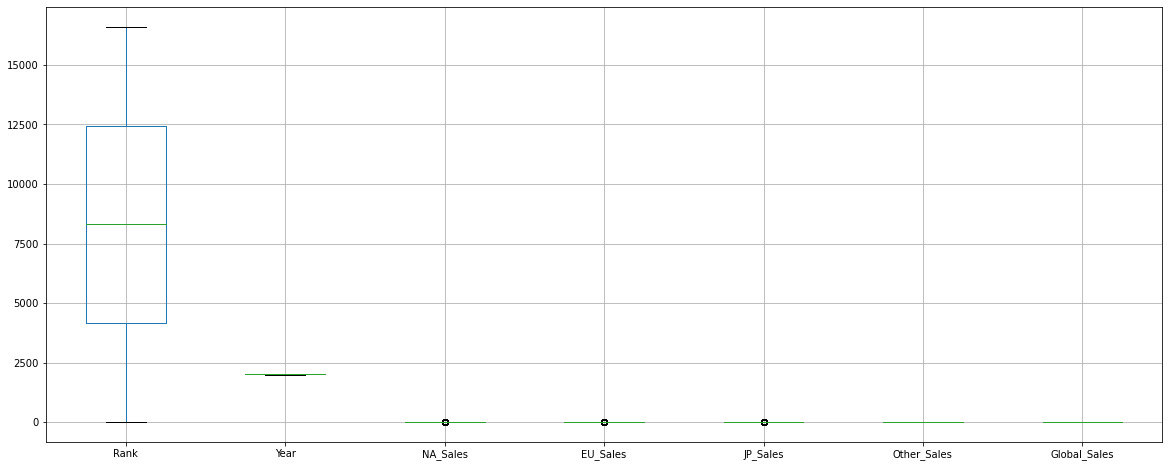

In [37]:
df.boxplot(figsize=(20,8))

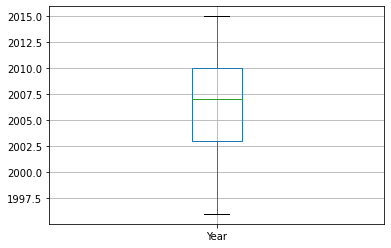

In [13]:
df.boxplot("Year")

In [12]:
min=df['Year'].quantile(0.05)
max=df['Year'].quantile(0.95)
new=np.where(df['Year']<min,min,df['Year'])
df.Year=new
new=np.where(df['Year']>max,max,df['Year'])
df.Year=new

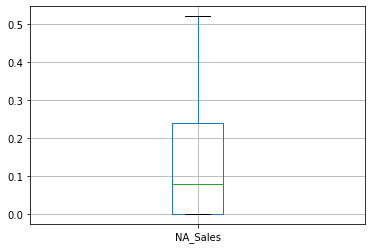

In [39]:
df.boxplot("NA_Sales")

In [38]:
min=df['NA_Sales'].quantile(0.05)
max=df['NA_Sales'].quantile(0.88)
new=np.where(df['NA_Sales']<min,min,df['NA_Sales'])
df.NA_Sales=new
new=np.where(df['NA_Sales']>max,max,df['NA_Sales'])
df.NA_Sales=new

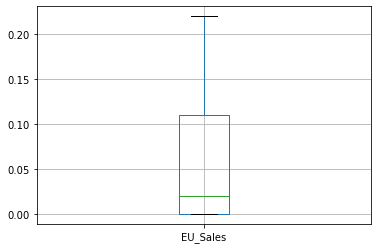

In [42]:
df.boxplot("EU_Sales")

In [41]:
min=df['EU_Sales'].quantile(0.05)
max=df['EU_Sales'].quantile(0.85)
new=np.where(df['EU_Sales']<min,min,df['EU_Sales'])
df.EU_Sales=new
new=np.where(df['EU_Sales']>max,max,df['EU_Sales'])
df.EU_Sales=new

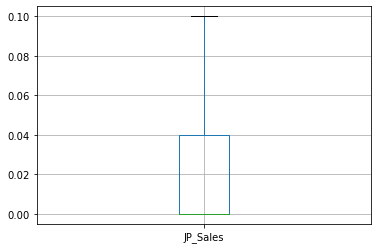

In [44]:
df.boxplot("JP_Sales")

In [43]:
min=df['JP_Sales'].quantile(0.05)
max=df['JP_Sales'].quantile(0.85)
new=np.where(df['JP_Sales']<min,min,df['JP_Sales'])
df.JP_Sales=new
new=np.where(df['JP_Sales']>max,max,df['JP_Sales'])
df.JP_Sales=new

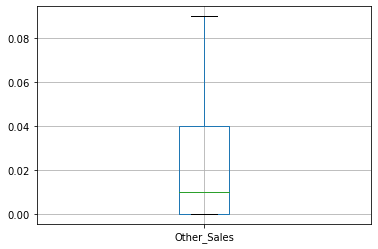

In [33]:
df.boxplot("Other_Sales")

In [32]:
min=df['Other_Sales'].quantile(0.05)
max=df['Other_Sales'].quantile(0.88)
new=np.where(df['Other_Sales']<min,min,df['Other_Sales'])
df.Other_Sales=new
new=np.where(df['Other_Sales']>max,max,df['Other_Sales'])
df.Other_Sales=new

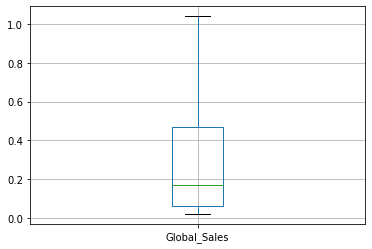

In [36]:
df.boxplot("Global_Sales")

In [35]:
min=df['Global_Sales'].quantile(0.05)
max=df['Global_Sales'].quantile(0.88)
new=np.where(df['Global_Sales']<min,min,df['Global_Sales'])
df.Global_Sales=new
new=np.where(df['Global_Sales']>max,max,df['Global_Sales'])
df.Global_Sales=new

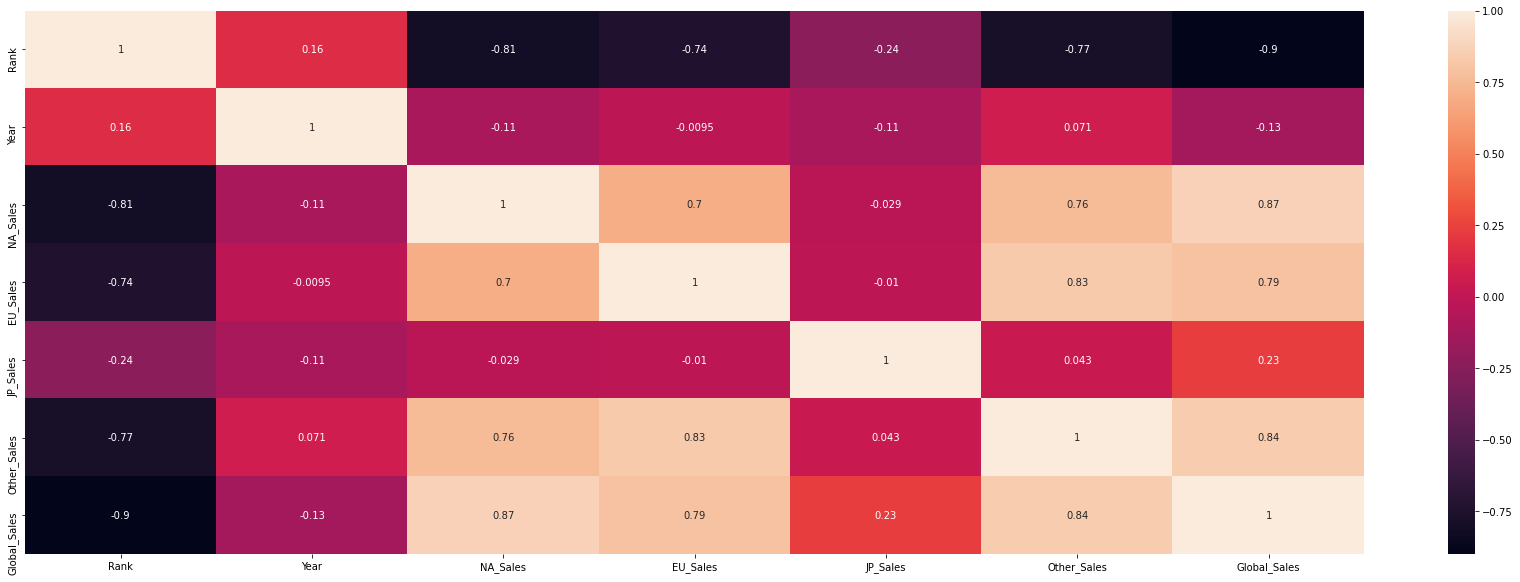

In [46]:
corr = df.corr()
plt.subplots(figsize = (30,10))
sns.heatmap(corr,annot=True)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Publisher'] = le.fit_transform(df['Publisher'])
df['Platform'] = le.fit_transform(df['Platform'])
df['Genre'] = le.fit_transform(df['Genre'])

In [69]:
#Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [62]:
y = df['Global_Sales']
x = df.drop(['Global_Sales','Rank'],axis=1)

In [63]:
Rtree = RandomForestRegressor()

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [65]:
Rtree.fit(x_train,y_train)

RandomForestRegressor()

In [66]:
Rtree.score(x_test,y_test)

0.9510598530852298

In [67]:
Ry_pred = Rtree.predict(x_test)

In [68]:
importances = list(Rtree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_test, importances)]
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Platform             Importance: 0.01
Variable: Year                 Importance: 0.01
Variable: Genre                Importance: 0.01
Variable: Publisher            Importance: 0.01
Variable: NA_Sales             Importance: 0.73
Variable: EU_Sales             Importance: 0.05
Variable: JP_Sales             Importance: 0.05
Variable: Other_Sales          Importance: 0.12


In [70]:
#Linear

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()

In [75]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [77]:
y_pred = model.predict(x_test)

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 0.010944226880941675
RMSE: 0.10461465901555898
R2: 0.9080724011839777


In [79]:
Score = model.score(x_test,y_test)
Score

0.9080724011839777